**Imports**

In [0]:
from keras.datasets import cifar10
from matplotlib import pyplot
%matplotlib inline
from scipy.misc import toimage
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


**Dataset**



1.   A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research (CIFAR).
2.   The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance.
3.  The photos are in color with red, green and blue components, but are small measuring 32 by 32 pixel squares.









In [0]:
from google.colab import drive
drive.mount('/content/cnn')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/cnn


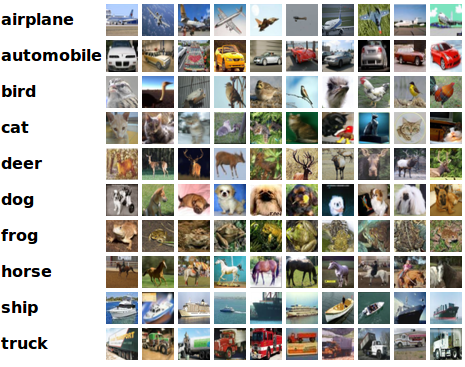

In [0]:
from IPython.display import Image,display
display(Image(filename='/content/cnn/My Drive/CNN_Tutorial/Test_Images/c.png',embed=True))

170500096/170498071 [==============================] - 60s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


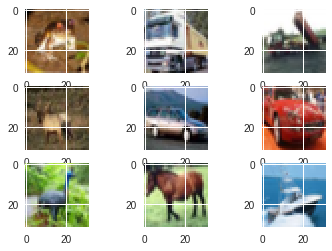

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
pyplot.show()

In [0]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50000
50000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Pre-Processing**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
import keras
from keras import layers
from keras import models

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

**Keras Callbacks**

In [0]:
def step_decay(epoch):
	initial_lrate = 1.0
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Ciphar_LeNet_Exp_LR.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Ciphar_LeNet_Exp_LR.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

In [0]:
from keras import optimizers
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
history=model.fit(X_train, y_train, validation_split=(0.2), epochs=50, batch_size=32,verbose=2,callbacks=[cv,mc,tb,rp])

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.6595831602096558
Test accuracy: 0.6038


**Loss Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(50)

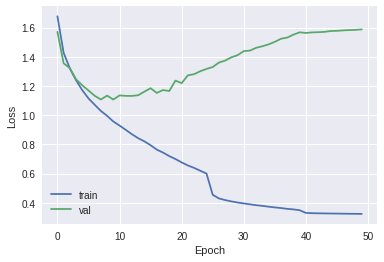

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

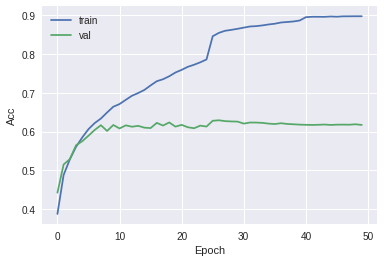

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Saving and loading models**

In [0]:
from keras.models import load_model
model2 = model.save('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist1.h5')
model2 = load_model("/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist.h5")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Prediction on Test Image **




4
[[4.49e-04 5.12e-07 2.61e-04 1.21e-01 6.08e-01 9.43e-02 1.01e-03 1.75e-01
  6.08e-06 2.04e-05]]


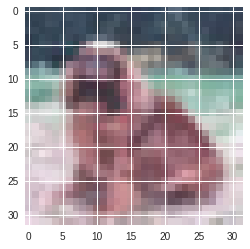

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[101].reshape(32,32,3)) #100
pred = model.predict(X_test[101].reshape(1,32, 32, 3))
print(pred.argmax())
print(pred)

#### TensorBoard Visualization

In [0]:
#tensorboard --logdir=/home/student/Documents/ActiveNeuron/Keras/ALL_CSV_MODEL/logs
#tensorboard --logdir=/tmp  --port=8008

In [0]:
from google.colab import drive
drive.mount('/content/cnn')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import numpy as np

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.65      0.65      1000
     class 1       0.72      0.69      0.71      1000
     class 2       0.47      0.47      0.48      1000
     class 3       0.38      0.40      0.39      1000
     class 4       0.52      0.48      0.50      1000
     class 5       0.45      0.46      0.45      1000
     class 6       0.65      0.66      0.66      1000
     class 7       0.64      0.64      0.64      1000
     class 8       0.68      0.69      0.68      1000
     class 9       0.65      0.67      0.66      1000

   micro avg       0.58      0.58      0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[645  33  68  26  30  13  17  18 109  41]
 [ 29 692  18  20   7   5  13  18  51 147]
 [ 65  12 475  77 108  89  85  46  23  20]
 [ 19  15  94 397  73 205  83  63  22  29]
 [ 27  10 112  87 485  69  66 106  24  14]
 [  9   8  84 239  60 456  45  71  15  13]
 [ 10  11  71  93  56  51 664  14  10  20]
 [ 19  12  43  42  90 100  13 638  14  29]
 [115  62  20  21  17  11  15   4 688  47]
 [ 56 107  15  30   9  20  19  24  55 665]]


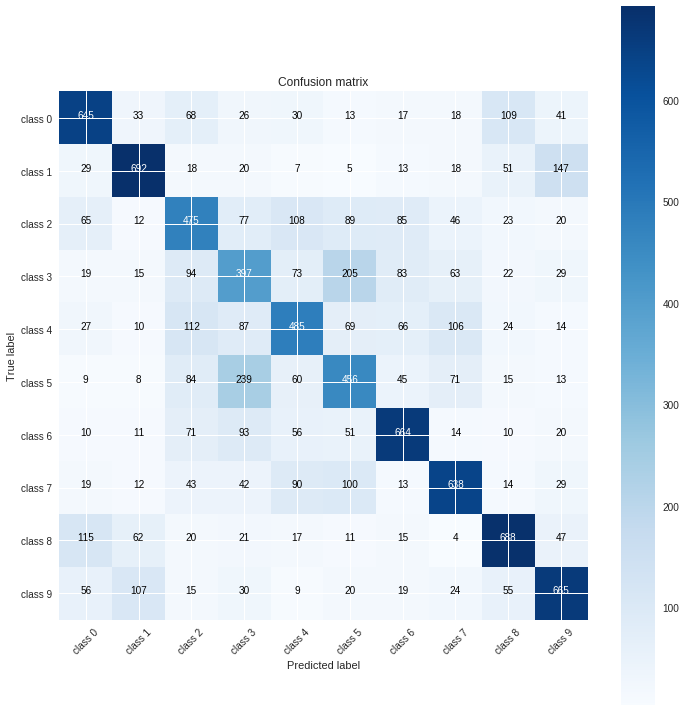

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()